# 3.4 Figure Design

In this section, we will look how adjusting figure components can make figures clearer and more understandable.

When creating figures, you should consider:
1. Who is the **target audience**?
2. What information do I want to **highlight**?
3. What is the most appropriate **way** to show this information?

For this majority of this section, we'll use data on COVID-19 hosted by the [Our World in Data](https://ourworldindata.org/coronavirus) project. ([Source](https://alan-turing-institute.github.io/rds-course/modules/m3/3.2-RulesOfTheGame.html))


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.loc[:,['continent', 'location', 'date', 'total_cases', 'population']].sample(n=5)

,continent,location,date,total_cases,population
150369,North America,Mexico,2022-02-15,5300537.0,127504120.0
174791,Europe,Northern Ireland,2021-11-11,NaN,1896000.0
84888,Africa,Gabon,2022-03-27,47584.0,2388997.0
70611,Africa,Equatorial Guinea,2022-07-24,16654.0,1674916.0
87406,Asia,Georgia,2023-02-20,1822045.0,3744385.0


In the data, each row is for a specific date, given a country. We will look at an aggregated view by examining the cumulative number of cases variable per country. However, if a country has more people it will have more cases. So we will need to do some preprocessing - we'll normalise the data and examine the number of cases per million people.

In [2]:
df_countries = df[df['continent'].notna()]

# select 'iso_code', 'location', 'gdp_per_capita' and any columns that start with 'total'
df_totals = df_countries.query('population > 1e+6').filter(regex="iso|loc|pop|cont|total|gdp *", axis = 1).groupby('location').max()

## Scales

**Linear scales** are commonly used in figures. However, if the pattern of data is not well represented by a linear scale, you can use a **non-linear** scale. 

In the below example, we've used a linear scale and plotted GDP per capita against total cases per million. We can see many points are clustered around the bottom of the plot. This means that the linear scale may not be the best choice for our data. A non-linear scale, such as a **logarithmic scale**, would be more appropriate.

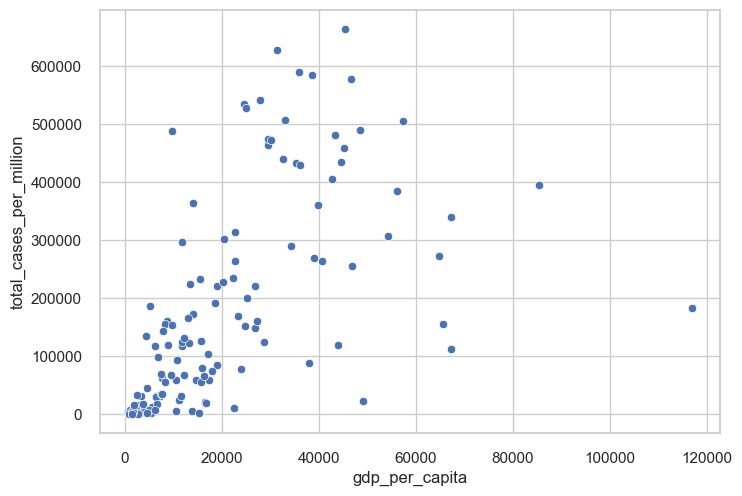

In [3]:
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million')
plt.show()

On the left-hand side, we only apply a log transformation to the number of cases. However, GDP per capita is still clustered at low values. By applying a log transformation to the x-axis, we can visualise the relationship more clearly, i.e. total cases increases with GDP per capita.

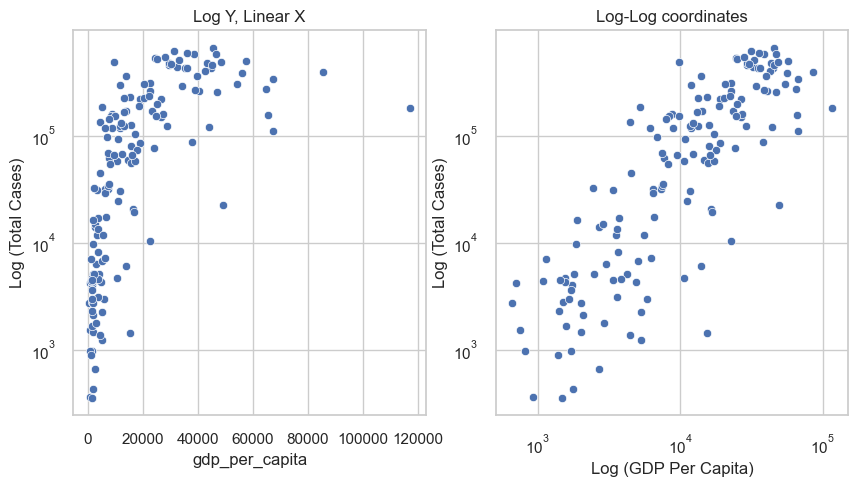

In [4]:
f, axes = plt.subplots(1,2, figsize =(10,5))

def loglog(ax, xscale = 'log', yscale='log', ylab='Log (Total Cases)', xlab = 'Log (GDP Per Capita)'):
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    


# log y-axes
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Log Y, Linear X')
axes[0].set_ylabel('Log (Total Cases)')

# log x-axes and log y-axes
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes[1])
loglog(axes[1])
axes[1].set_title('Log-Log coordinates')


plt.show()

## Text

Although perhaps self-explanatory, you should annotate your figures. This includes:

**Titles** - The job of a title is to convey why the reader should care. Titles can be descriptive or explain the main message of the figure.

**Axes** - Axes should be labelled, and the units should be included.

In the below example, we've added a title emphasising the relationship between the two variables and have modified the axis labels to show that they are log-transformed.

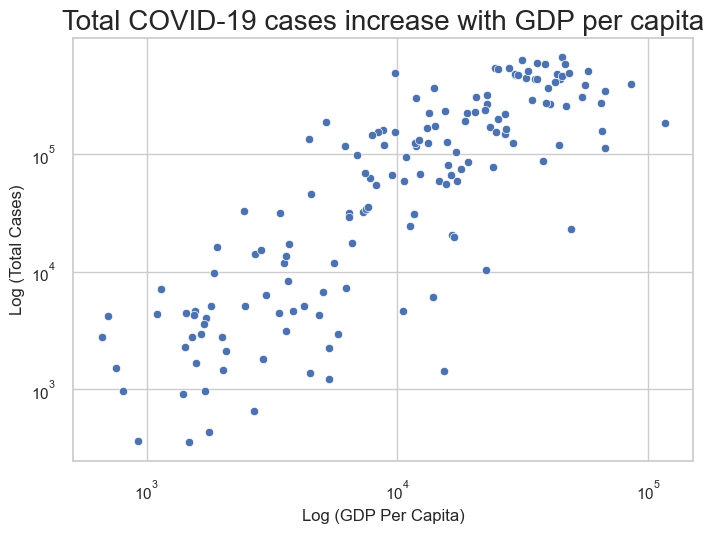

In [5]:
f, axes = plt.subplots(1,1)

sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', ax=axes)
loglog(axes)
plt.title("Total COVID-19 cases increase with GDP per capita", fontdict={'fontsize':20})
plt.show()

## Colours

There are different uses for colours in figures:

1. **Categorising** different groups.
2. Showing the **magnitude** of a value.
3. **Highlighting** specific points.


### Categorising different groups

Different colours can be used to distinguish between different groups. For example, in the figure on the left, we've used different colours to distinguish between different continents. However, too many colours might make it difficult to read. If you have multiple categories, you could consider a different encoding methods by adjusting shape or marker size. In the figure on the right however, the figure uses both colour and shape to encode the different categories. You could argue that this is too much information to encode in a single figure, which makes it harder to understand.

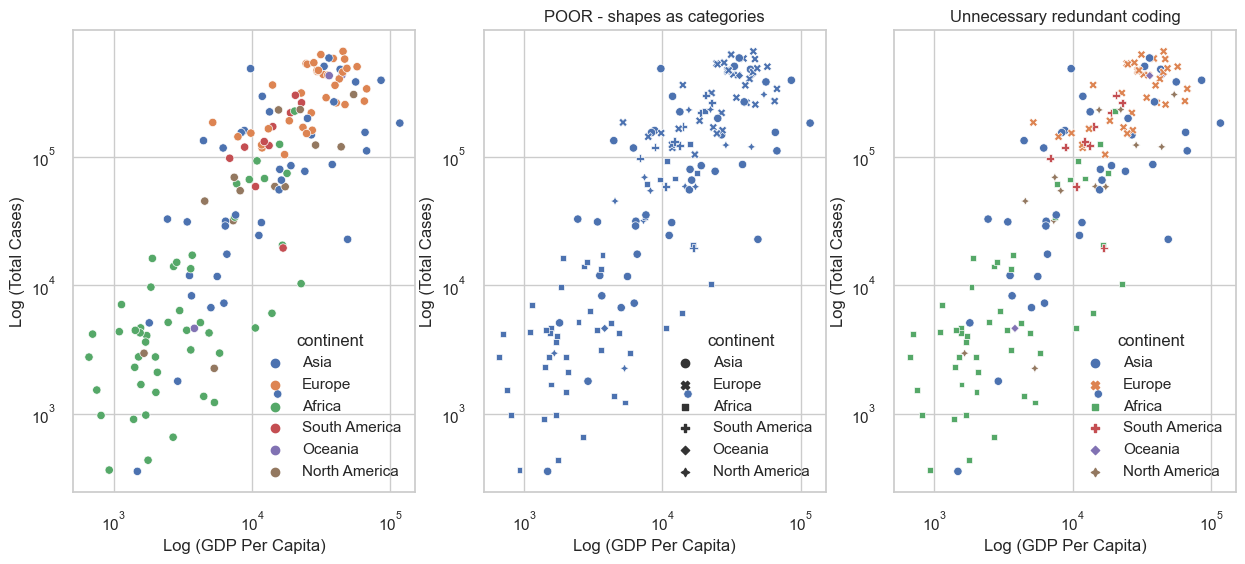

In [6]:
f, axes = plt.subplots(1,3, figsize =(15,6))

# plot with a default palette
sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue='continent', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel('Log (Total Cases)')
axes[0].set_xlabel('Log (GDP Per Capita)')

sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', style='continent', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel('Log (Total Cases)')
axes[1].set_xlabel('Log (GDP Per Capita)')
axes[1].set_title('POOR - shapes as categories')

sns.scatterplot(data=df_totals, x = 'gdp_per_capita', y = 'total_cases_per_million', hue='continent', style='continent', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_xscale('log')
axes[2].set_ylabel('Log (Total Cases)')
axes[2].set_xlabel('Log (GDP Per Capita)')
axes[2].set_title('Unnecessary redundant coding')

plt.show()

### Showing the magnitude of a value

Matplotlib has a number of different [colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that you can use to show the magnitude of a value. However, you should be careful when using these. For example, if you use a colour map that is not perceptually uniform, it can be difficult to compare the magnitude of different values.

The example below shows precipitation risk in Arizona on 15 January 2023 ([Source](https://twitter.com/AZWeatherForce/status/1614787054449356805)). Since the colour map is not perceptually uniform, it's unclear which areas of the map have the highest precipitation risks.

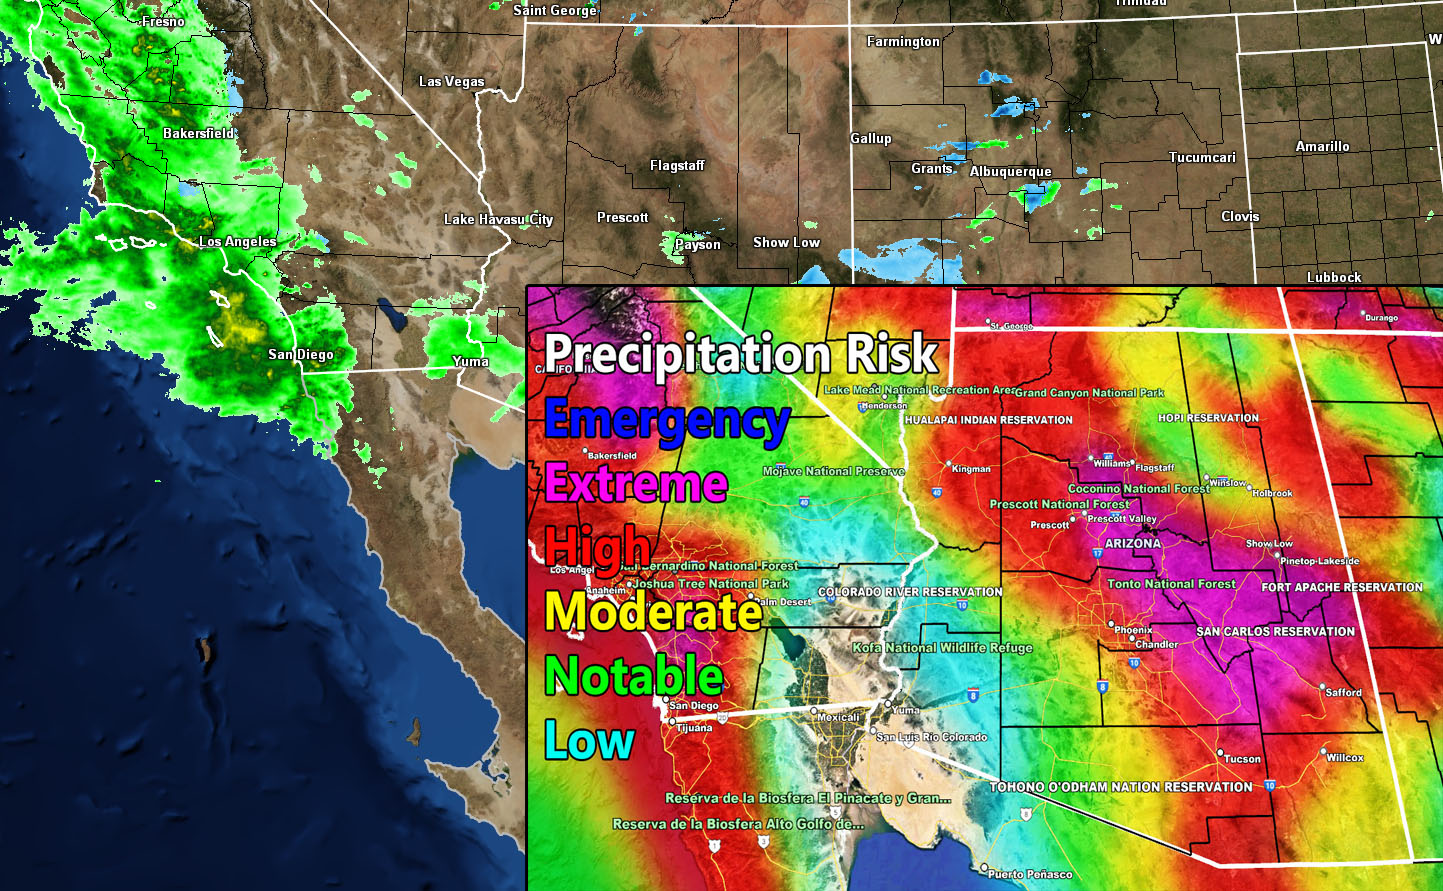

In [7]:
with Image.open('media/precipitation_risk.jpg') as img:
    display(img)

### Highlighting specific points

You can use colour to highlight specific points in your figure. For example, you could use a different colour to highlight the points that are above a certain threshold. Make sure that you use a colour that is easy to see, and that it is not too similar to the colour of the other points.

For example, for the COVID-19 data, if we are only interested in the UK and surrounding countries, we could grey out the other countries:

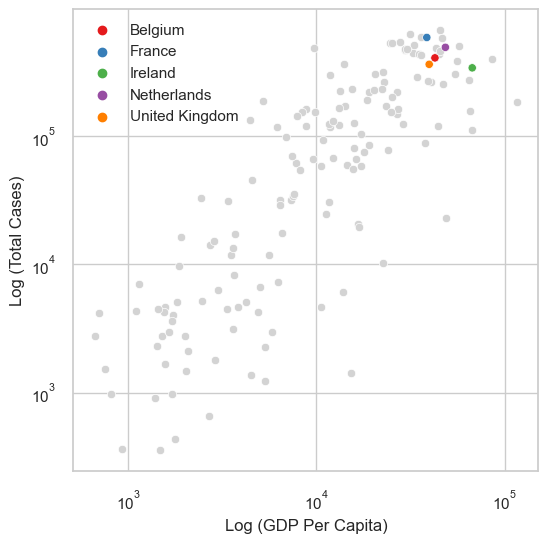

In [8]:
countries = ['United Kingdom','Ireland','France','Belgium','Netherlands']
other = 'Rest of World'
df_totals = df_totals.assign(highlight = [loc if loc in countries else other
                                       for loc in df_totals.index])

# pick a list of colours
cmap = sns.color_palette("Set1", n_colors=len(set(df_totals.highlight.values))-1)

f, ax = plt.subplots(1,1, figsize = (6,6))

# plot grey first so that the highlighted values are on top
sns.scatterplot(data=df_totals.query("highlight == @other"), x = 'gdp_per_capita', y = 'total_cases_per_million', color='lightgray')
sns.scatterplot(data=df_totals.query("highlight in @countries"), x = 'gdp_per_capita', y = 'total_cases_per_million', hue='highlight', palette=cmap)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Log (Total Cases)')
ax.set_xlabel('Log (GDP Per Capita)')
ax.legend(title='')
plt.show()

### Accessibility

Make sure that your figures are accessible to people with colour blindness. Properly sequential scales should be fine, however diverging scales can make different values seem similar.

The following image ([source](https://clauswilke.com/dataviz/color-pitfalls.html)) shows a colour-vision deficiency for the Colorbrewer sequential scale Heat, which runs from dark red to light yellow. Even though the specific colors look different under the three types of colour vision deficiency, in each case we can see a clear gradient from dark to light. Therefore, this colour scale is safe to use.

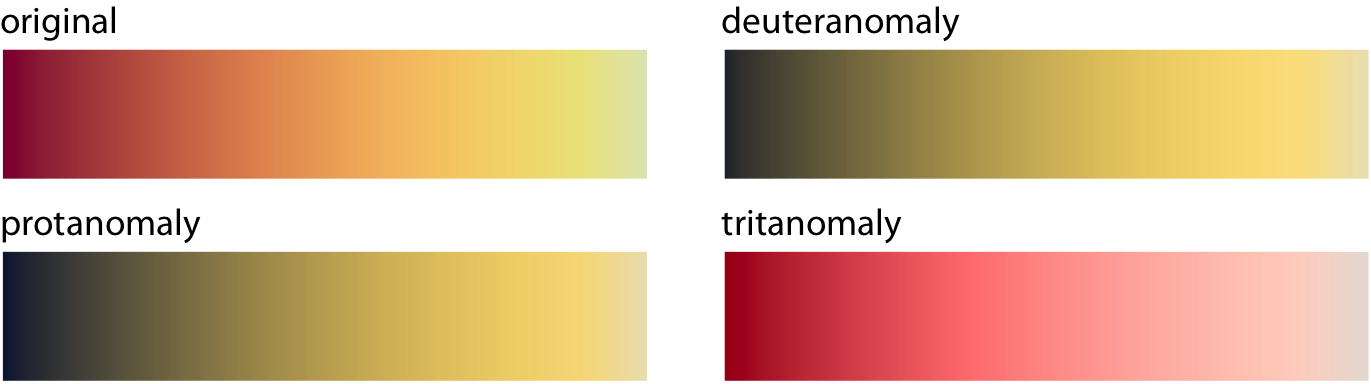

In [9]:
with Image.open('media/heat-cvd-sim-1.png') as img:
    display(img)

For the below diverging colour scale however, the red and green colours are nearly indistinguishable for people with red-green colour vision deficiency.

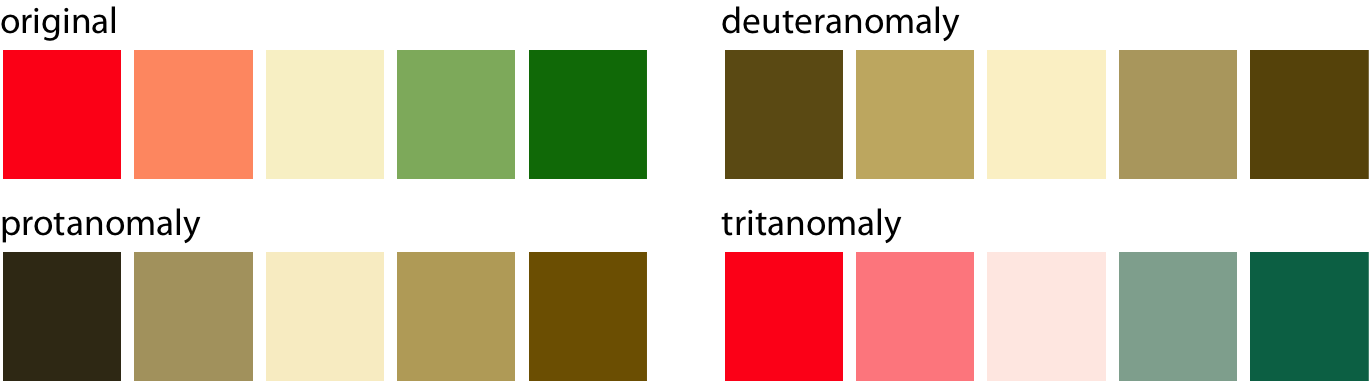

In [10]:
with Image.open('media/red-green-cvd-sim-1.png') as img:
    display(img)

Slight modifications to the colours can make the scale more accessible. For example, changing the red colour to a pink (which is a mix of red and blue) and adding yellow to the green colour makes the scales more distinguishable.

You can check your figures with a colour blindness simulator, or use a pre-existing palette that is designed to be accessible ([ColorBrewer](https://colorbrewer2.org/) has an example).

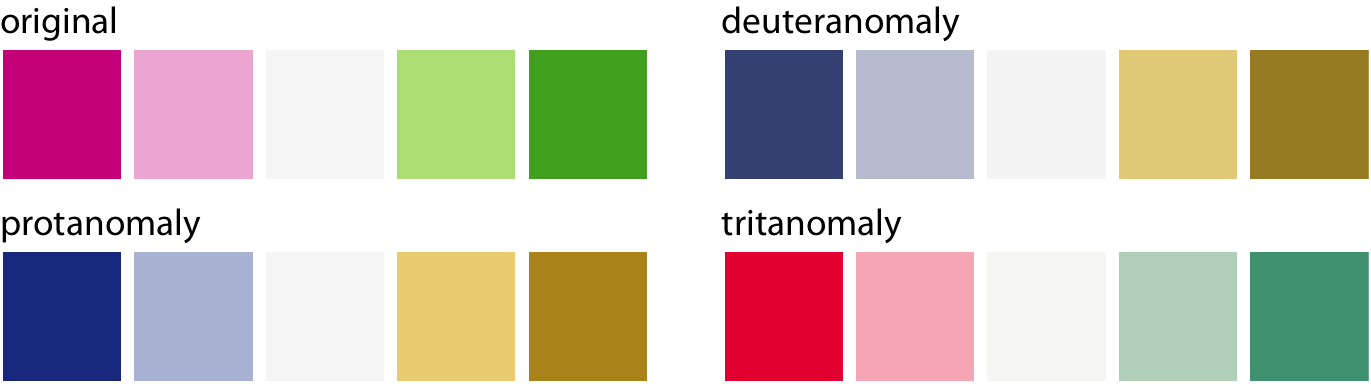

In [11]:
with Image.open('media/PiYG-cvd-sim-1.png') as img:
    display(img)

## Combining multiple figures

Although it's possible to convey several different messages in a single figure, it can be better to split the information into multiple figures. In this way, you can guide the audience to the information you want to highlight.

## Uncertainty

If possible, you should show the uncertainty of your data. This can be done by adding error bars. 

The below example displays the mean body mass of different species of penguins with 95% confidence intervals.

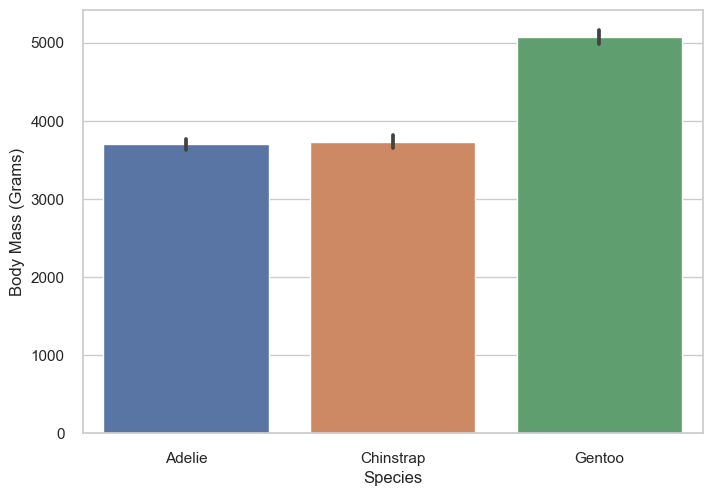

In [12]:
penguin_df = sns.load_dataset("penguins")
sns.barplot(data=penguin_df, x="species", y="body_mass_g")
plt.ylabel('Body Mass (Grams)')
plt.xlabel('Species')
plt.show()

However, don't try and add 'T's to your figures instead (yes this is from a real paper)

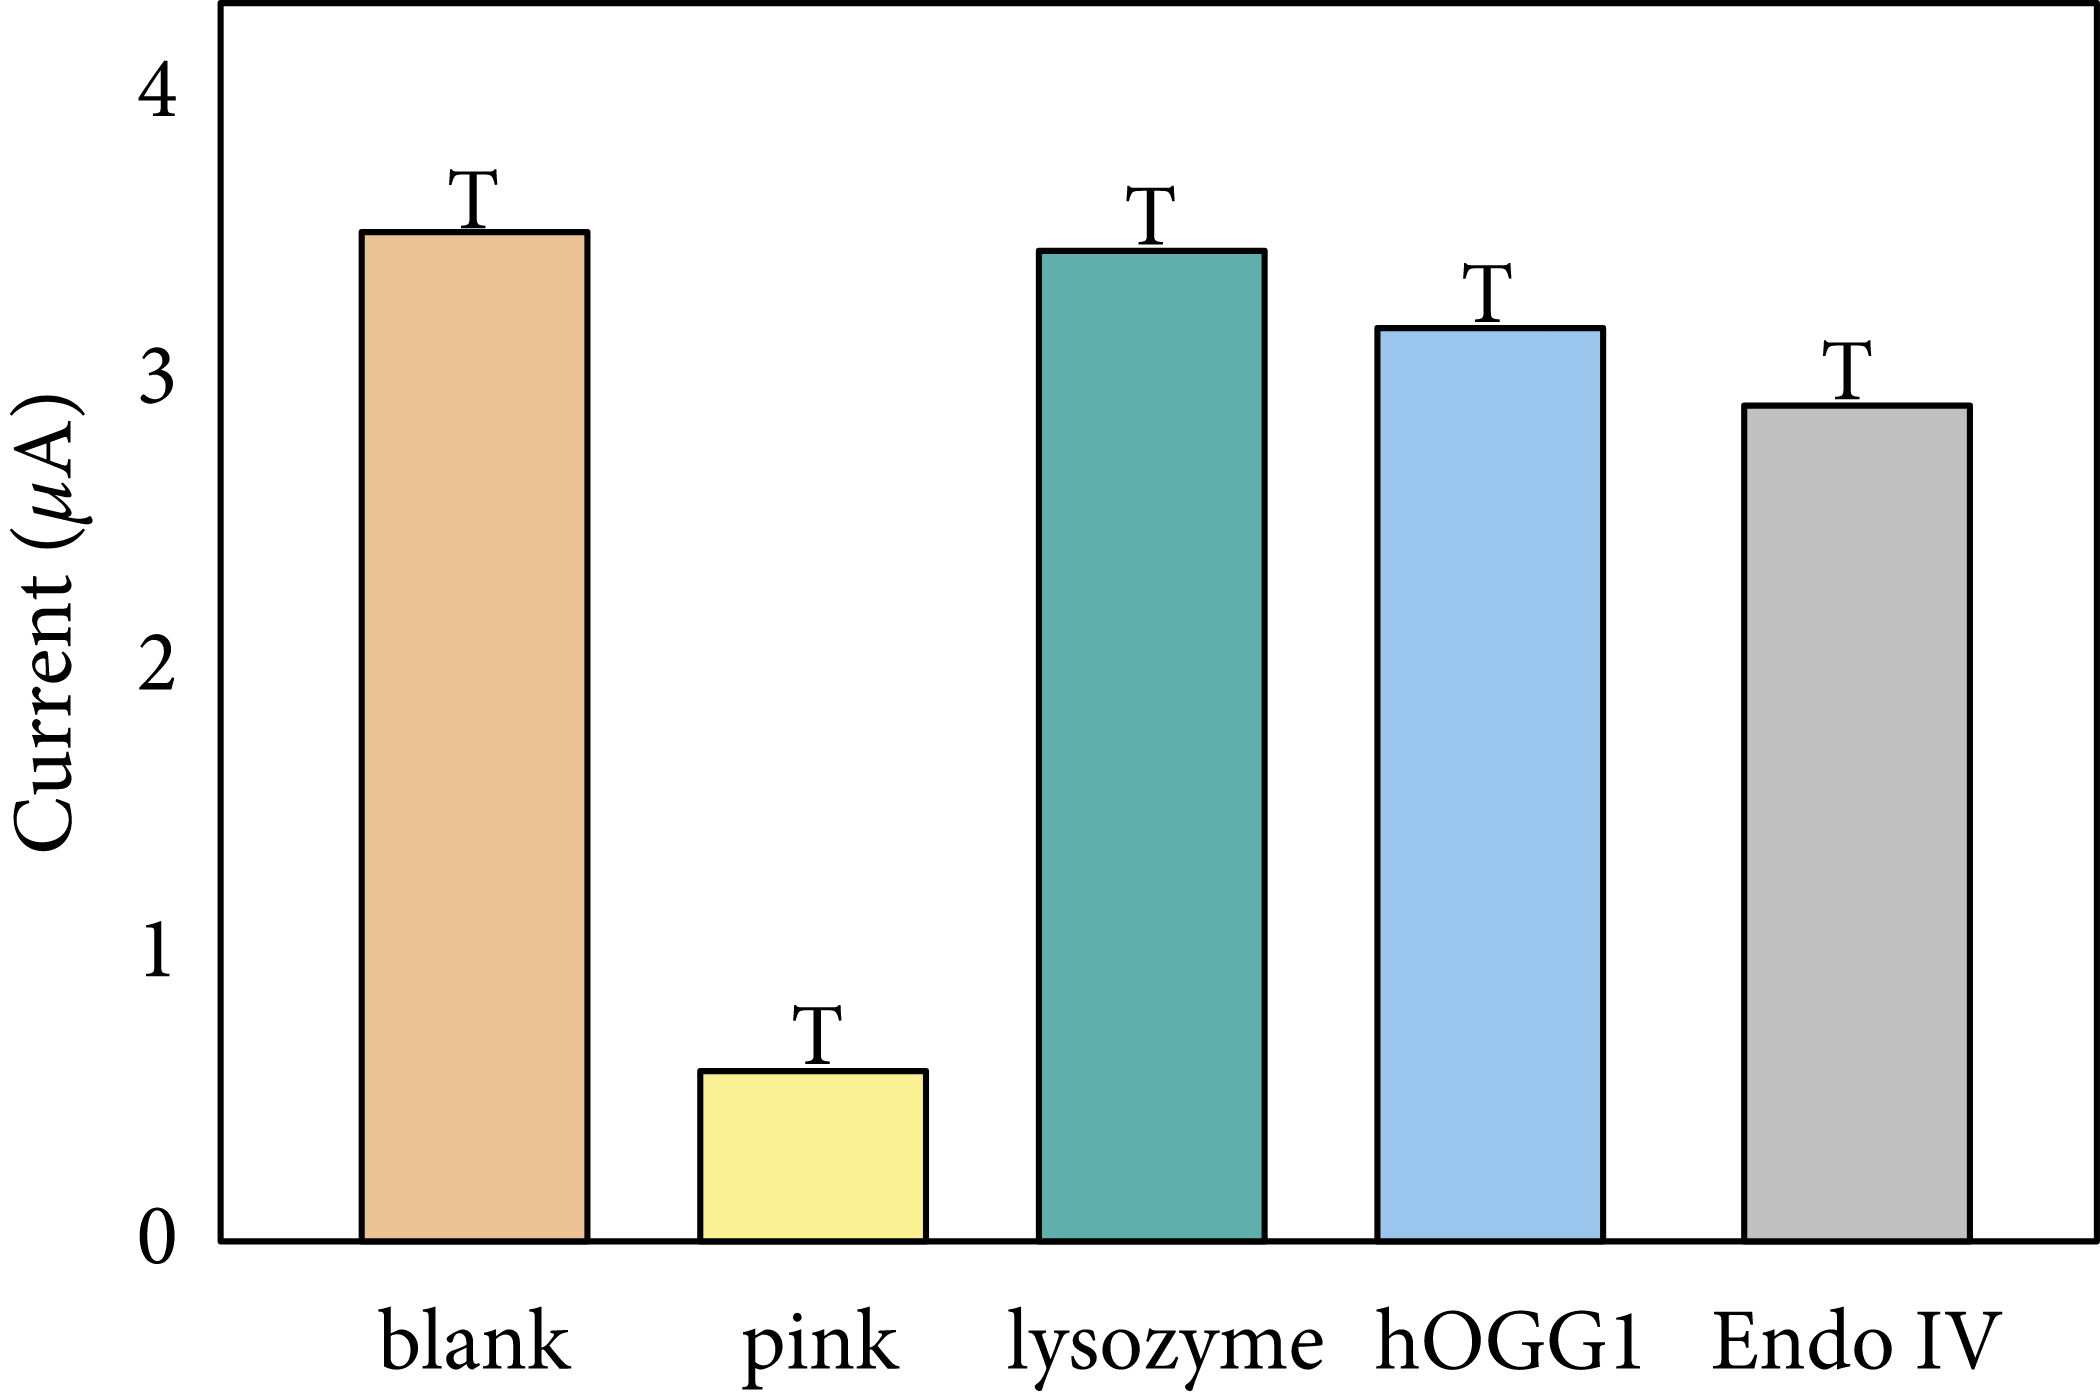

In [13]:
with Image.open('media/error_bar.png') as img:
    display(img)

## Saving figures

Try to save your figures in a vector format, such as PDF or SVG. This will allow you to zoom in on the figure without losing any quality. You can also save your figures in a raster format, such as PNG or JPG. However, these formats are not suitable for zooming in on the figure.

The below example shows the difference between a vector and raster format. [Source](https://clauswilke.com/dataviz/image-file-formats.html)
- (a) **Original image**. The black square shows the area that is zoomed in on in (b) and (c).
- (b) In this case the image is saved as a **raster format**. The image is pixelated when zoomed in on.
- (c) In this case the image is saved as a **vector format**. The image maintains its quality when zoomed in on.

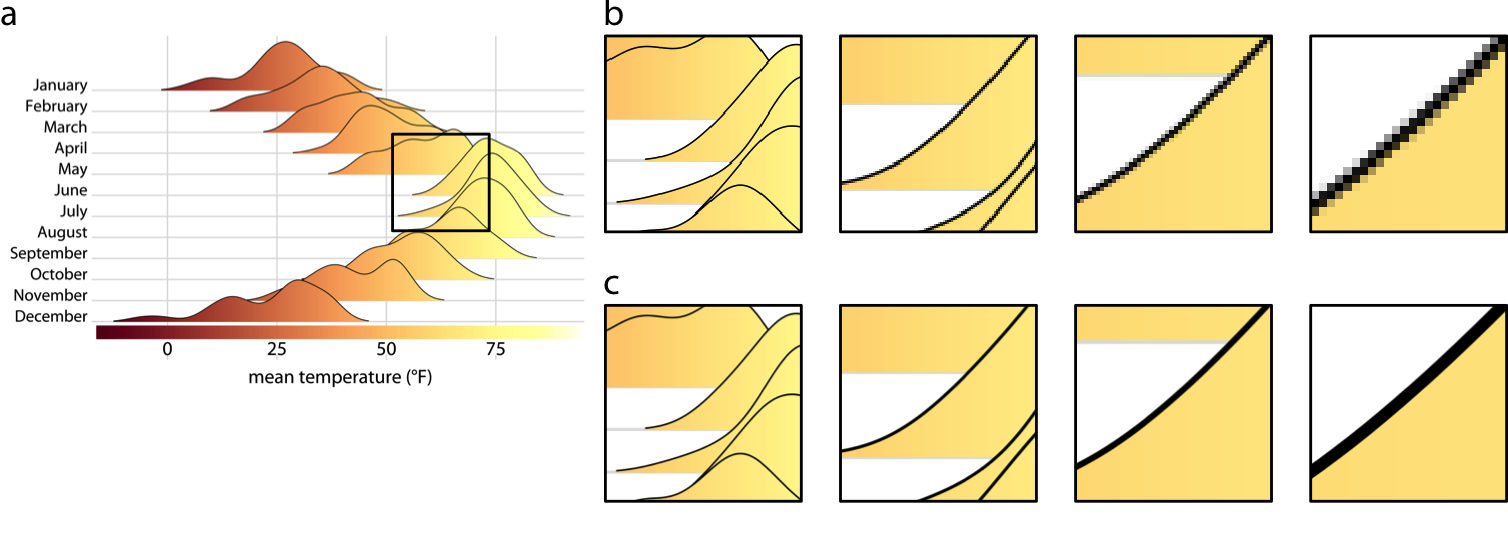

In [14]:
with Image.open('media/bitmap-zoom.png') as img:
    display(img)

However, vector graphics do have some disadvantages. For example, they can be quite large, and they can take a long time to load. There may also be differences in how they are displayed on different devices. For example, if a font is not installed on a device, it may be replaced with a different font.

## Libraries for data visualisation

* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)
* [Plotly](https://plotly.com/python/)
* [Bokeh](https://docs.bokeh.org/en/latest/)
* [ggplot](https://ggplot2.tidyverse.org/)

## Additional resources

If you'd like to learn more, check out the following resources. We developed much of this section based on their work:
* [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/) by Claus O. Wilke
* [Introduction to Research Data Science](https://alan-turing-institute.github.io/rds-course/index.html) by The Alan Turing Institute
* [Dos and don'ts of data visualisation](https://www.eea.europa.eu/data-and-maps/daviz/learn-more/chart-dos-and-donts/) by the European Environment Agency

Examples of good graphics:
* [Our World in Data](https://ourworldindata.org/)
* [Financial Times Visual and Data Journalism](https://www.ft.com/visual-and-data-journalism)